In [20]:
import pandas as pd
import numpy as np

In [21]:
df = pd.read_csv("./data/5. label 지정 완료.csv",encoding='cp949')
df.columns

Index(['회사명', '거래소코드', '회계년도', '상장일', '상장폐지일', '소속코드', '산업명', '매출액증가율',
       '유형자산증가율', '재고자산증가율', '비유동자산증가율', '유동자산증가율', '자기자본증가율', '총자본증가율',
       '순이익증가율', '매출액총이익률', '매출액순이익률', '자기자본순이익률', '총자본사업이익률', '총자본순이익률',
       '1주당매출액', '1주당순이익', '유동비율', '당좌비율', '현금비율', '순운전자본비율', '부채비율',
       '이자보상배율이자비용', '비유동비율', '유동자산구성비율', '자기자본구성비율', '자기자본배율', '총자본회전률',
       '자기자본회전률', '비유동자산회전률', '재고자산회전률', '매출채권회전률', '매입채무회전률', '매입채무회전기간',
       '재고자산회전기간', '매출채권회전기간', '1회전기간', '운전자본회전률', '순운전자본회전률', '유형자산회전율',
       '유동자산회전률', '당좌자산회전률', '부가가치', '총자본투자효율', '설비투자효율', '기계투자효율', '부가가치율',
       '노동소득분배율', '자본분배율', '이윤분배율', 'label'],
      dtype='object')

In [22]:
fea = ['회사명', '거래소코드', '회계년도', '상장일', '상장폐지일', '소속코드', '산업명',
'유동자산증가율','총자본증가율',  '자기자본순이익률', '총자본순이익률','자본분배율',  '부가가치율',
'순운전자본비율', '자기자본배율', "매입채무회전률",'매출채권회전기간','label']

In [23]:
df = df[fea]
df

,회사명,거래소코드,회계년도,상장일,상장폐지일,소속코드,산업명,유동자산증가율,총자본증가율,자기자본순이익률,총자본순이익률,자본분배율,부가가치율,순운전자본비율,자기자본배율,매입채무회전률,매출채권회전기간,label
0,(주)CMG제약,58820,2011-12-01,2001-08-31,NaN,5,의료용 물질 및 의약품 제조업,17.64,1.98,-8.28,-5.58,10.18,19.56,28.23,82.55,11.95,148.80,0.0
1,(주)CMG제약,58820,2012-12-01,2001-08-31,NaN,5,의료용 물질 및 의약품 제조업,207.08,109.15,-26.84,-15.78,-1649.87,1.66,70.60,95.69,7.83,197.16,0.0
2,(주)CMG제약,58820,2013-12-01,2001-08-31,NaN,5,의료용 물질 및 의약품 제조업,-18.89,-2.09,0.74,0.52,28.72,34.29,58.50,113.12,6.20,176.20,0.0
3,(주)CMG제약,58820,2014-12-01,2001-08-31,NaN,5,의료용 물질 및 의약품 제조업,-25.93,3.86,0.32,0.28,20.70,31.04,33.72,113.13,5.27,196.72,0.0
4,(주)CMG제약,58820,2015-12-01,2001-08-31,NaN,5,의료용 물질 및 의약품 제조업,-7.17,-2.64,-7.62,-6.37,-44.10,15.96,30.82,106.02,5.66,174.14,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9273,흥구석유(주),24060,2016-12-01,1994-12-07,NaN,5,도매 및 상품 중개업,7.35,1.39,6.20,4.75,55.54,6.86,63.26,1008.27,8.17,66.81,0.0
9274,흥구석유(주),24060,2017-12-01,1994-12-07,NaN,5,도매 및 상품 중개업,7.34,0.98,6.21,4.95,56.65,9.22,58.09,1052.03,7.52,64.90,0.0
9275,흥구석유(주),24060,2018-12-01,1994-12-07,NaN,5,도매 및 상품 중개업,-21.19,-5.89,5.53,4.48,53.77,8.82,60.65,1096.89,7.94,65.07,0.0
9276,흥구석유(주),24060,2019-12-01,1994-12-07,NaN,5,도매 및 상품 중개업,80.74,11.24,2.80,2.32,37.86,5.61,59.10,1082.55,10.40,55.54,0.0


In [24]:
for column in df.columns:
    if df[column].dtype == 'float64':  # 실수형 데이터만 처리
        # 비율 계산 (현재 값 / 이전 값)
        df[f'{column}_차이'] = df[column] - df[column].shift(1)

        # 변동률 계산 (현재 값 - 이전 값) / 이전 값
        denominator  = df[column].shift(1).abs() * 100
        df[f'{column}_변동률'] = np.where(denominator  == 0, 0, (df[column] - df[column].shift(1)) / denominator )


# 결과 출력
df

,회사명,거래소코드,회계년도,상장일,상장폐지일,소속코드,산업명,유동자산증가율,총자본증가율,자기자본순이익률,...,순운전자본비율_차이,순운전자본비율_변동률,자기자본배율_차이,자기자본배율_변동률,매입채무회전률_차이,매입채무회전률_변동률,매출채권회전기간_차이,매출채권회전기간_변동률,label_차이,label_변동률
0,(주)CMG제약,58820,2011-12-01,2001-08-31,NaN,5,의료용 물질 및 의약품 제조업,17.64,1.98,-8.28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(주)CMG제약,58820,2012-12-01,2001-08-31,NaN,5,의료용 물질 및 의약품 제조업,207.08,109.15,-26.84,...,42.37,0.015009,13.14,1.591763e-03,-4.12,-0.003448,48.36,0.003250,0.0,0.0
2,(주)CMG제약,58820,2013-12-01,2001-08-31,NaN,5,의료용 물질 및 의약품 제조업,-18.89,-2.09,0.74,...,-12.10,-0.001714,17.43,1.821507e-03,-1.63,-0.002082,-20.96,-0.001063,0.0,0.0
3,(주)CMG제약,58820,2014-12-01,2001-08-31,NaN,5,의료용 물질 및 의약품 제조업,-25.93,3.86,0.32,...,-24.78,-0.004236,0.01,8.840170e-07,-0.93,-0.001500,20.52,0.001165,0.0,0.0
4,(주)CMG제약,58820,2015-12-01,2001-08-31,NaN,5,의료용 물질 및 의약품 제조업,-7.17,-2.64,-7.62,...,-2.90,-0.000860,-7.11,-6.284805e-04,0.39,0.000740,-22.58,-0.001148,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9273,흥구석유(주),24060,2016-12-01,1994-12-07,NaN,5,도매 및 상품 중개업,7.35,1.39,6.20,...,4.39,0.000746,41.74,4.318542e-04,-0.27,-0.000320,-3.25,-0.000464,0.0,0.0
9274,흥구석유(주),24060,2017-12-01,1994-12-07,NaN,5,도매 및 상품 중개업,7.34,0.98,6.21,...,-5.17,-0.000817,43.76,4.340107e-04,-0.65,-0.000796,-1.91,-0.000286,0.0,0.0
9275,흥구석유(주),24060,2018-12-01,1994-12-07,NaN,5,도매 및 상품 중개업,-21.19,-5.89,5.53,...,2.56,0.000441,44.86,4.264137e-04,0.42,0.000559,0.17,0.000026,0.0,0.0
9276,흥구석유(주),24060,2019-12-01,1994-12-07,NaN,5,도매 및 상품 중개업,80.74,11.24,2.80,...,-1.55,-0.000256,-14.34,-1.307333e-04,2.46,0.003098,-9.53,-0.001465,0.0,0.0


In [25]:
df.columns

Index(['회사명', '거래소코드', '회계년도', '상장일', '상장폐지일', '소속코드', '산업명', '유동자산증가율',
       '총자본증가율', '자기자본순이익률', '총자본순이익률', '자본분배율', '부가가치율', '순운전자본비율', '자기자본배율',
       '매입채무회전률', '매출채권회전기간', 'label', '유동자산증가율_차이', '유동자산증가율_변동률',
       '총자본증가율_차이', '총자본증가율_변동률', '자기자본순이익률_차이', '자기자본순이익률_변동률', '총자본순이익률_차이',
       '총자본순이익률_변동률', '자본분배율_차이', '자본분배율_변동률', '부가가치율_차이', '부가가치율_변동률',
       '순운전자본비율_차이', '순운전자본비율_변동률', '자기자본배율_차이', '자기자본배율_변동률', '매입채무회전률_차이',
       '매입채무회전률_변동률', '매출채권회전기간_차이', '매출채권회전기간_변동률', 'label_차이', 'label_변동률'],
      dtype='object')

In [26]:
df = df[['회사명', '거래소코드', '회계년도', '상장일', '상장폐지일', '소속코드', '산업명', '유동자산증가율',
       '총자본증가율', '자기자본순이익률', '총자본순이익률', '자본분배율', '부가가치율', '순운전자본비율', '자기자본배율',
       '매입채무회전률', '매출채권회전기간', 'label', '유동자산증가율_차이', '유동자산증가율_변동률',
       '총자본증가율_차이', '총자본증가율_변동률', '자기자본순이익률_차이', '자기자본순이익률_변동률', '총자본순이익률_차이',
       '총자본순이익률_변동률', '자본분배율_차이', '자본분배율_변동률', '부가가치율_차이', '부가가치율_변동률',
       '순운전자본비율_차이', '순운전자본비율_변동률', '자기자본배율_차이', '자기자본배율_변동률', '매입채무회전률_차이',
       '매입채무회전률_변동률', '매출채권회전기간_차이', '매출채권회전기간_변동률']]

df

,회사명,거래소코드,회계년도,상장일,상장폐지일,소속코드,산업명,유동자산증가율,총자본증가율,자기자본순이익률,...,부가가치율_차이,부가가치율_변동률,순운전자본비율_차이,순운전자본비율_변동률,자기자본배율_차이,자기자본배율_변동률,매입채무회전률_차이,매입채무회전률_변동률,매출채권회전기간_차이,매출채권회전기간_변동률
0,(주)CMG제약,58820,2011-12-01,2001-08-31,NaN,5,의료용 물질 및 의약품 제조업,17.64,1.98,-8.28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(주)CMG제약,58820,2012-12-01,2001-08-31,NaN,5,의료용 물질 및 의약품 제조업,207.08,109.15,-26.84,...,-17.90,-0.009151,42.37,0.015009,13.14,1.591763e-03,-4.12,-0.003448,48.36,0.003250
2,(주)CMG제약,58820,2013-12-01,2001-08-31,NaN,5,의료용 물질 및 의약품 제조업,-18.89,-2.09,0.74,...,32.63,0.196566,-12.10,-0.001714,17.43,1.821507e-03,-1.63,-0.002082,-20.96,-0.001063
3,(주)CMG제약,58820,2014-12-01,2001-08-31,NaN,5,의료용 물질 및 의약품 제조업,-25.93,3.86,0.32,...,-3.25,-0.000948,-24.78,-0.004236,0.01,8.840170e-07,-0.93,-0.001500,20.52,0.001165
4,(주)CMG제약,58820,2015-12-01,2001-08-31,NaN,5,의료용 물질 및 의약품 제조업,-7.17,-2.64,-7.62,...,-15.08,-0.004858,-2.90,-0.000860,-7.11,-6.284805e-04,0.39,0.000740,-22.58,-0.001148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9273,흥구석유(주),24060,2016-12-01,1994-12-07,NaN,5,도매 및 상품 중개업,7.35,1.39,6.20,...,0.62,0.000994,4.39,0.000746,41.74,4.318542e-04,-0.27,-0.000320,-3.25,-0.000464
9274,흥구석유(주),24060,2017-12-01,1994-12-07,NaN,5,도매 및 상품 중개업,7.34,0.98,6.21,...,2.36,0.003440,-5.17,-0.000817,43.76,4.340107e-04,-0.65,-0.000796,-1.91,-0.000286
9275,흥구석유(주),24060,2018-12-01,1994-12-07,NaN,5,도매 및 상품 중개업,-21.19,-5.89,5.53,...,-0.40,-0.000434,2.56,0.000441,44.86,4.264137e-04,0.42,0.000559,0.17,0.000026
9276,흥구석유(주),24060,2019-12-01,1994-12-07,NaN,5,도매 및 상품 중개업,80.74,11.24,2.80,...,-3.21,-0.003639,-1.55,-0.000256,-14.34,-1.307333e-04,2.46,0.003098,-9.53,-0.001465


In [27]:
df.to_csv("./data/1. 변동률 데이터 추가.csv")

# 데이터 분할

In [28]:
train = df[df["회계년도"]<="2015"]
de1 = df[df["회계년도"]=="2011-12-01"].index
train.drop(de1,inplace=True)
train.reset_index(inplace=True,drop=True)
train

,회사명,거래소코드,회계년도,상장일,상장폐지일,소속코드,산업명,유동자산증가율,총자본증가율,자기자본순이익률,...,부가가치율_차이,부가가치율_변동률,순운전자본비율_차이,순운전자본비율_변동률,자기자본배율_차이,자기자본배율_변동률,매입채무회전률_차이,매입채무회전률_변동률,매출채권회전기간_차이,매출채권회전기간_변동률
0,(주)CMG제약,58820,2012-12-01,2001-08-31,NaN,5,의료용 물질 및 의약품 제조업,207.08,109.15,-26.84,...,-17.90,-0.009151,42.37,0.015009,13.14,1.591763e-03,-4.12,-0.003448,48.36,0.003250
1,(주)CMG제약,58820,2013-12-01,2001-08-31,NaN,5,의료용 물질 및 의약품 제조업,-18.89,-2.09,0.74,...,32.63,0.196566,-12.10,-0.001714,17.43,1.821507e-03,-1.63,-0.002082,-20.96,-0.001063
2,(주)CMG제약,58820,2014-12-01,2001-08-31,NaN,5,의료용 물질 및 의약품 제조업,-25.93,3.86,0.32,...,-3.25,-0.000948,-24.78,-0.004236,0.01,8.840170e-07,-0.93,-0.001500,20.52,0.001165
3,(주)ES큐브,50120,2012-12-01,2002-04-25,NaN,5,도매 및 상품 중개업,-33.37,-16.58,0.29,...,9.58,0.004246,3.93,0.001131,7.86,2.401833e-04,16.60,0.008418,-55.51,-0.006496
4,(주)ES큐브,50120,2013-12-01,2002-04-25,NaN,5,도매 및 상품 중개업,68.92,1.85,-40.47,...,-29.69,-0.009238,34.99,0.009046,-106.56,-3.179851e-03,11.03,0.003037,-5.90,-0.001971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2365,휴림로봇(주),90710,2013-12-01,2006-12-05,NaN,5,기타 기계 및 장비 제조업,-17.87,-8.68,-25.32,...,2.02,0.001351,-13.79,-0.006691,-114.17,-2.084117e-03,3.12,0.007324,-77.74,-0.004246
2366,휴림로봇(주),90710,2014-12-01,2006-12-05,NaN,5,기타 기계 및 장비 제조업,-26.10,-30.32,-121.93,...,-26.74,-0.015757,-26.36,-0.038651,-324.27,-7.477862e-03,-2.31,-0.003130,13.94,0.001323
2367,흥구석유(주),24060,2012-12-01,1994-12-07,NaN,5,도매 및 상품 중개업,-2.59,-1.14,-13.77,...,19.89,0.010648,-2.39,-0.019917,1681.31,1.436403e-01,-4.20,-0.004294,-63.80,-0.003596
2368,흥구석유(주),24060,2013-12-01,1994-12-07,NaN,5,도매 및 상품 중개업,-20.97,-4.74,11.94,...,4.84,0.040000,55.22,0.153816,-946.13,-5.261071e-03,4.34,0.007778,-47.40,-0.004171


In [29]:
de1 = df[df["회계년도"]>="2018"].index
de2 = df[df["회계년도"]<="2015"].index
test1 = df.drop(de1)
test1 = test1.drop(de2)
test1.reset_index(inplace=True,drop=True)
test1

,회사명,거래소코드,회계년도,상장일,상장폐지일,소속코드,산업명,유동자산증가율,총자본증가율,자기자본순이익률,...,부가가치율_차이,부가가치율_변동률,순운전자본비율_차이,순운전자본비율_변동률,자기자본배율_차이,자기자본배율_변동률,매입채무회전률_차이,매입채무회전률_변동률,매출채권회전기간_차이,매출채권회전기간_변동률
0,(주)CMG제약,58820,2015-12-01,2001-08-31,NaN,5,의료용 물질 및 의약품 제조업,-7.17,-2.64,-7.62,...,-15.08,-0.004858,-2.90,-0.000860,-7.11,-0.000628,0.39,0.000740,-22.58,-0.001148
1,(주)CMG제약,58820,2016-12-01,2001-08-31,NaN,5,의료용 물질 및 의약품 제조업,199.84,96.31,2.34,...,15.94,0.009987,31.93,0.010360,80.00,0.007546,0.60,0.001060,-36.76,-0.002111
2,(주)CMG제약,58820,2017-12-01,2001-08-31,NaN,5,의료용 물질 및 의약품 제조업,3.12,-1.27,2.85,...,1.11,0.000348,1.45,0.000231,-6.12,-0.000329,0.29,0.000463,-16.22,-0.001181
3,(주)ES큐브,50120,2015-12-01,2002-04-25,NaN,5,도매 및 상품 중개업,-10.89,-1.75,1.56,...,-6.65,-0.005123,-6.66,-0.000938,4.23,0.000185,-5.77,-0.001397,-1.50,-0.000554
4,(주)ES큐브,50120,2016-12-01,2002-04-25,NaN,5,도매 및 상품 중개업,23.57,89.08,38.07,...,72.05,0.113823,-19.22,-0.002986,111.35,0.004776,-4.14,-0.001165,1.88,0.000735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2752,휴젤(주),145020,2016-12-01,2015-12-24,NaN,5,의료용 물질 및 의약품 제조업,40.79,26.00,18.79,...,14.92,0.002668,-3.55,-0.000736,13972.99,0.098226,18.09,0.009747,25.94,0.005170
2753,휴젤(주),145020,2017-12-01,2015-12-24,NaN,5,의료용 물질 및 의약품 제조업,348.89,178.94,15.36,...,-0.09,-0.000013,35.34,0.007913,16905.23,0.010981,9.10,0.002483,18.10,0.002378
2754,흥구석유(주),24060,2015-12-01,1994-12-07,NaN,5,도매 및 상품 중개업,-15.96,12.89,7.66,...,0.46,0.000796,5.78,0.001089,47.57,0.000518,0.44,0.000550,-4.73,-0.000632
2755,흥구석유(주),24060,2016-12-01,1994-12-07,NaN,5,도매 및 상품 중개업,7.35,1.39,6.20,...,0.62,0.000994,4.39,0.000746,41.74,0.000432,-0.27,-0.000320,-3.25,-0.000464


In [30]:
test2 = df[df["회계년도"]>="2018"]
de1 = test2[test2["회계년도"]=="2020-12-01"].index
test2.drop(de1,inplace=True)
test2.reset_index(inplace=True,drop=True)
test2

,회사명,거래소코드,회계년도,상장일,상장폐지일,소속코드,산업명,유동자산증가율,총자본증가율,자기자본순이익률,...,부가가치율_차이,부가가치율_변동률,순운전자본비율_차이,순운전자본비율_변동률,자기자본배율_차이,자기자본배율_변동률,매입채무회전률_차이,매입채무회전률_변동률,매출채권회전기간_차이,매출채권회전기간_변동률
0,(주)CMG제약,58820,2018-12-01,2001-08-31,NaN,5,의료용 물질 및 의약품 제조업,0.18,4.39,6.01,...,0.78,0.000236,-0.49,-0.000076,11.09,0.000616,2.38,0.003634,-2.75,-0.000227
1,(주)CMG제약,58820,2019-12-01,2001-08-31,NaN,5,의료용 물질 및 의약품 제조업,85.06,68.07,2.15,...,-1.32,-0.000391,9.78,0.001535,68.43,0.003583,4.88,0.005465,-1.51,-0.000128
2,(주)ES큐브,50120,2018-12-01,2002-04-25,NaN,5,도매 및 상품 중개업,-11.71,6.17,-5.54,...,-17.51,-0.008354,-38.08,-0.008519,-10.76,-0.000615,-0.04,-0.000013,4.34,0.001641
3,(주)ES큐브,50120,2019-12-01,2002-04-25,NaN,5,도매 및 상품 중개업,696.75,312.66,-21.76,...,-4.73,-0.013710,21.16,0.031964,-34.74,-0.002116,14.22,0.004507,844.61,0.274313
4,(주)가비아,79940,2018-12-01,2005-10-19,NaN,5,출판업,18.07,13.54,12.58,...,6.46,0.001542,4.35,0.001581,104.17,0.001264,4.08,0.002177,3.66,0.000770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,휴림로봇(주),90710,2019-12-01,2006-12-05,NaN,5,기타 기계 및 장비 제조업,-6.77,-6.24,-34.70,...,16.46,0.005379,10.50,0.005276,-9.14,-0.000502,0.32,0.000649,15.79,0.001282
2199,휴젤(주),145020,2018-12-01,2015-12-24,NaN,5,의료용 물질 및 의약품 제조업,0.80,11.86,9.80,...,0.03,0.000004,-7.93,-0.000991,1094.65,0.000339,-11.90,-0.002601,24.02,0.002550
2200,휴젤(주),145020,2019-12-01,2015-12-24,NaN,5,의료용 물질 및 의약품 제조업,-6.41,-2.57,6.25,...,-15.46,-0.002184,-4.63,-0.000642,-1742.34,-0.000522,0.96,0.000284,-35.40,-0.002994
2201,흥구석유(주),24060,2018-12-01,1994-12-07,NaN,5,도매 및 상품 중개업,-21.19,-5.89,5.53,...,-0.40,-0.000434,2.56,0.000441,44.86,0.000426,0.42,0.000559,0.17,0.000026


In [31]:
# train, test1, test2 부도기업 확인하기
# 상장폐지된 데이터 확인하기
print(len(train[train["label"]==1]))
print(len(train[train["label"]==0]))
print(len(test1[test1["label"]==1]))
print(len(test1[test1["label"]==0]))
print(len(test2[test2["label"]==1]))
print(len(test2[test2["label"]==0]))

47
2323
31
2726
22
2181


In [32]:
train

,회사명,거래소코드,회계년도,상장일,상장폐지일,소속코드,산업명,유동자산증가율,총자본증가율,자기자본순이익률,...,부가가치율_차이,부가가치율_변동률,순운전자본비율_차이,순운전자본비율_변동률,자기자본배율_차이,자기자본배율_변동률,매입채무회전률_차이,매입채무회전률_변동률,매출채권회전기간_차이,매출채권회전기간_변동률
0,(주)CMG제약,58820,2012-12-01,2001-08-31,NaN,5,의료용 물질 및 의약품 제조업,207.08,109.15,-26.84,...,-17.90,-0.009151,42.37,0.015009,13.14,1.591763e-03,-4.12,-0.003448,48.36,0.003250
1,(주)CMG제약,58820,2013-12-01,2001-08-31,NaN,5,의료용 물질 및 의약품 제조업,-18.89,-2.09,0.74,...,32.63,0.196566,-12.10,-0.001714,17.43,1.821507e-03,-1.63,-0.002082,-20.96,-0.001063
2,(주)CMG제약,58820,2014-12-01,2001-08-31,NaN,5,의료용 물질 및 의약품 제조업,-25.93,3.86,0.32,...,-3.25,-0.000948,-24.78,-0.004236,0.01,8.840170e-07,-0.93,-0.001500,20.52,0.001165
3,(주)ES큐브,50120,2012-12-01,2002-04-25,NaN,5,도매 및 상품 중개업,-33.37,-16.58,0.29,...,9.58,0.004246,3.93,0.001131,7.86,2.401833e-04,16.60,0.008418,-55.51,-0.006496
4,(주)ES큐브,50120,2013-12-01,2002-04-25,NaN,5,도매 및 상품 중개업,68.92,1.85,-40.47,...,-29.69,-0.009238,34.99,0.009046,-106.56,-3.179851e-03,11.03,0.003037,-5.90,-0.001971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2365,휴림로봇(주),90710,2013-12-01,2006-12-05,NaN,5,기타 기계 및 장비 제조업,-17.87,-8.68,-25.32,...,2.02,0.001351,-13.79,-0.006691,-114.17,-2.084117e-03,3.12,0.007324,-77.74,-0.004246
2366,휴림로봇(주),90710,2014-12-01,2006-12-05,NaN,5,기타 기계 및 장비 제조업,-26.10,-30.32,-121.93,...,-26.74,-0.015757,-26.36,-0.038651,-324.27,-7.477862e-03,-2.31,-0.003130,13.94,0.001323
2367,흥구석유(주),24060,2012-12-01,1994-12-07,NaN,5,도매 및 상품 중개업,-2.59,-1.14,-13.77,...,19.89,0.010648,-2.39,-0.019917,1681.31,1.436403e-01,-4.20,-0.004294,-63.80,-0.003596
2368,흥구석유(주),24060,2013-12-01,1994-12-07,NaN,5,도매 및 상품 중개업,-20.97,-4.74,11.94,...,4.84,0.040000,55.22,0.153816,-946.13,-5.261071e-03,4.34,0.007778,-47.40,-0.004171


In [33]:
a = ['유동자산증가율',
       '총자본증가율', '자기자본순이익률', '총자본순이익률', '자본분배율', '부가가치율', '순운전자본비율', '자기자본배율',
       '매입채무회전률', '매출채권회전기간', '유동자산증가율_차이', '총자본증가율_차이', '자기자본순이익률_차이',
       '총자본순이익률_차이', '자본분배율_차이', '부가가치율_차이', '순운전자본비율_차이', '자기자본배율_차이',
       '매입채무회전률_차이', '매출채권회전기간_차이', '유동자산증가율_변동률', '총자본증가율_변동률',
       '자기자본순이익률_변동률', '총자본순이익률_변동률', '자본분배율_변동률', '부가가치율_변동률', '순운전자본비율_변동률',
       '자기자본배율_변동률', '매입채무회전률_변동률', '매출채권회전기간_변동률']

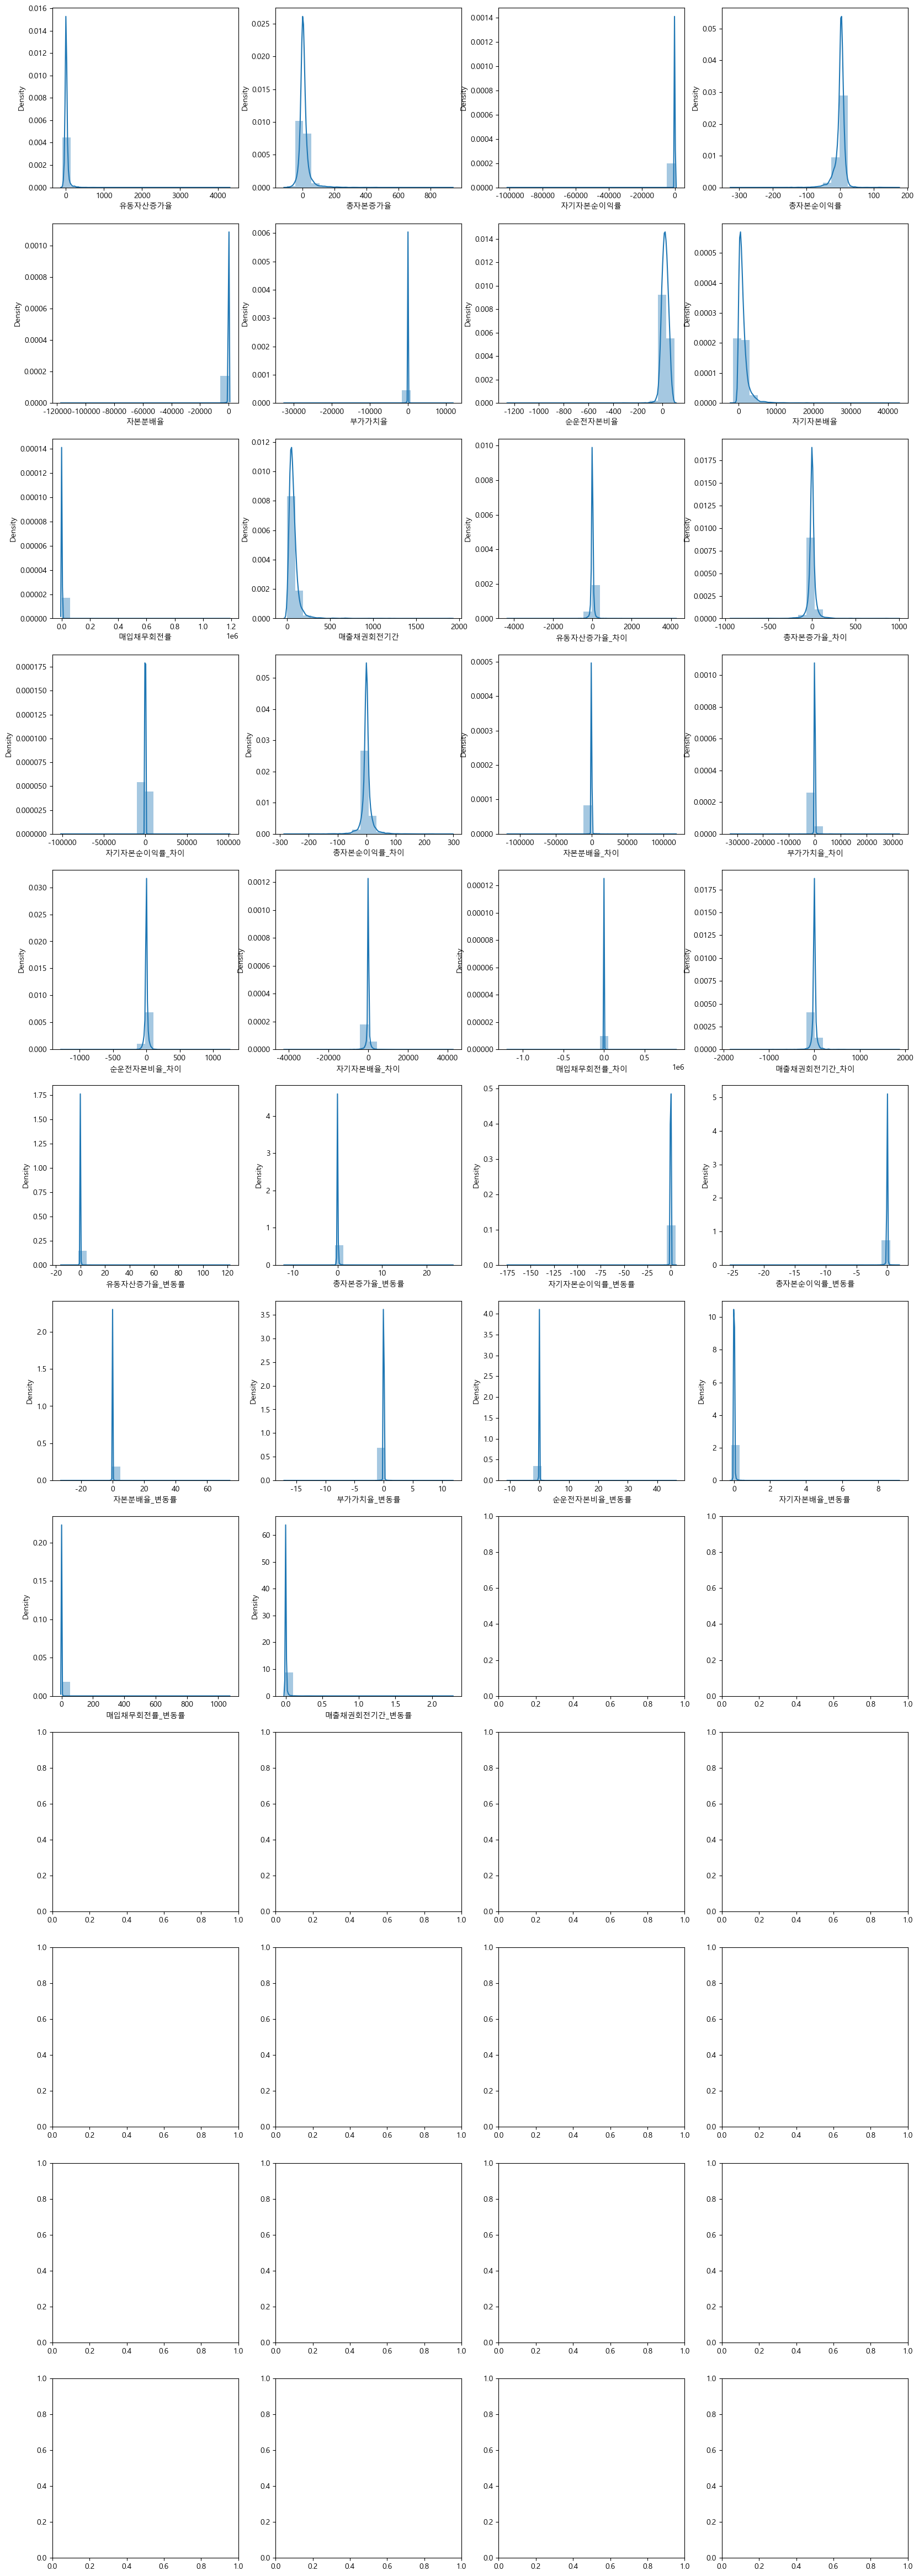

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

## histogram
col_n = 4
row_n = 12

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))

for i,col in enumerate(a):
    sns.distplot(df[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)])

유동자산증가율
총자본증가율
자기자본순이익률
총자본순이익률
자본분배율
부가가치율
순운전자본비율
자기자본배율
매입채무회전률
매출채권회전기간
유동자산증가율_차이
총자본증가율_차이
자기자본순이익률_차이
총자본순이익률_차이
자본분배율_차이
부가가치율_차이
순운전자본비율_차이
자기자본배율_차이
매입채무회전률_차이
매출채권회전기간_차이
유동자산증가율_변동률
총자본증가율_변동률
자기자본순이익률_변동률
총자본순이익률_변동률
자본분배율_변동률
부가가치율_변동률
순운전자본비율_변동률
자기자본배율_변동률
매입채무회전률_변동률
매출채권회전기간_변동률


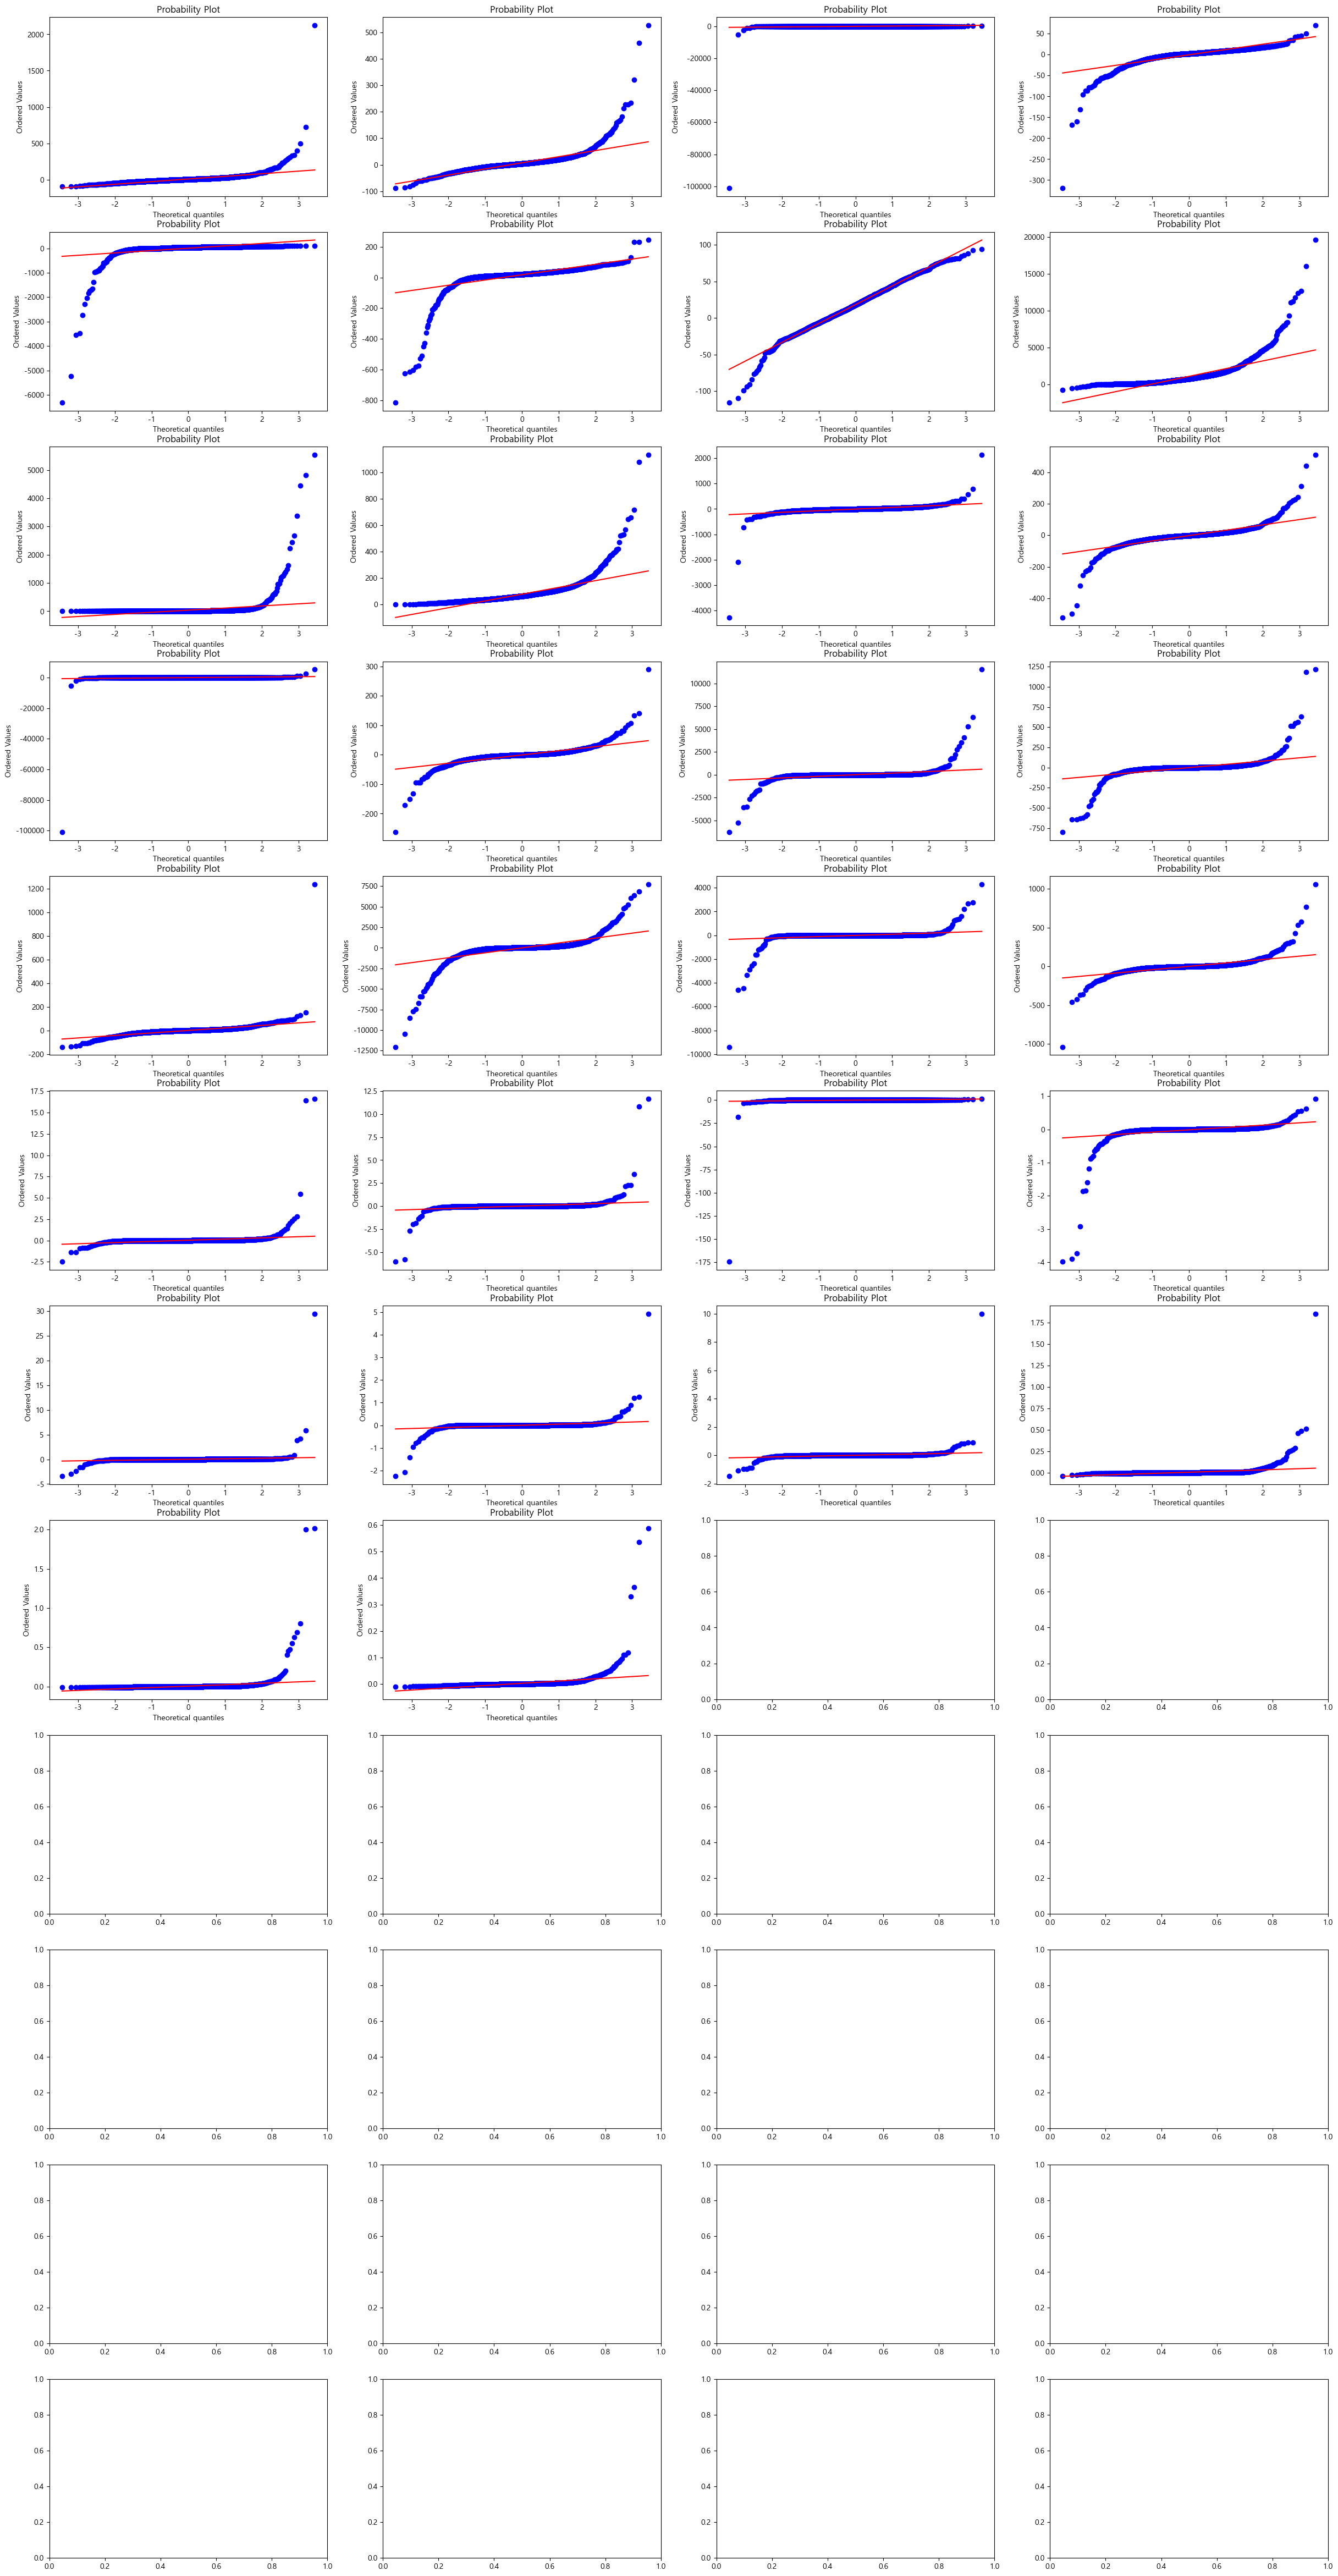

In [35]:
from scipy.stats import norm
from scipy import stats
from statsmodels.formula.api import ols
from scipy.stats import kstest
## histogram
col_n = 4
row_n = 12

# stats.probplot(df["대비_국고1년"], dist=stats.norm, plot=plt)
# plt.show()
fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

for i,col in enumerate(a):
    stats.probplot(train[col],dist=stats.norm, plot=ax[int(i/col_n),int(i%col_n)])
    print(col)
    

In [36]:
train.to_csv("./data/1. 변동성 train.csv")
test1.to_csv("./data/1. 변동성 test1.csv")
test2.to_csv("./data/1. 변동성 test2.csv")